# Principal Component Analysis (PCA)

This exercise will show how to use the pca with python following https://openclassrooms.com/fr/courses/4379436-explorez-vos-donnees-avec-des-algorithmes-non-supervises/4379506-tp-acp-d-un-jeu-de-donnees-sur-les-performances-d-athletes-olympiques.

## Exploring the Data

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, decomposition
from pylab import *

In [3]:
df = pd.read_csv("decathlon.txt", sep="\t")
df.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar


In [4]:
df.describe()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,10.998049,7.260000,14.477073,1.976829,49.616341,14.605854,44.325610,4.762439,58.316585,279.024878,12.121951,8005.365854
std,0.263023,0.316402,0.824428,0.088951,1.153451,0.471789,3.377845,0.278000,4.826820,11.673247,7.918949,342.385145
min,10.440000,6.610000,12.680000,1.850000,46.810000,13.970000,37.920000,4.200000,50.310000,262.100000,1.000000,7313.000000
25%,10.850000,7.030000,13.880000,1.920000,48.930000,14.210000,41.900000,4.500000,55.270000,271.020000,6.000000,7802.000000
50%,10.980000,7.300000,14.570000,1.950000,49.400000,14.480000,44.410000,4.800000,58.360000,278.050000,11.000000,8021.000000
75%,11.140000,7.480000,14.970000,2.040000,50.300000,14.980000,46.070000,4.920000,60.890000,285.100000,18.000000,8122.000000
max,11.640000,7.960000,16.360000,2.150000,53.200000,15.670000,51.650000,5.400000,70.520000,317.000000,28.000000,8893.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, SEBRLE to Casarsa
Data columns (total 13 columns):
100m           41 non-null float64
Long.jump      41 non-null float64
Shot.put       41 non-null float64
High.jump      41 non-null float64
400m           41 non-null float64
110m.hurdle    41 non-null float64
Discus         41 non-null float64
Pole.vault     41 non-null float64
Javeline       41 non-null float64
1500m          41 non-null float64
Rank           41 non-null int64
Points         41 non-null int64
Competition    41 non-null object
dtypes: float64(10), int64(2), object(1)
memory usage: 4.5+ KB


We are going to eliminating some of the data we don't want to keep in order to proceed PCA

## Data pre-processing

Since ACP only use numerical variable, we need to transform it.

In [14]:
X = df.drop(labels=["Competition", "Rank", "Points"], axis=1)
X.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4


We first need to standardize our matrix using sklearn, this will give us the covariance matrix

In [19]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = pd.DataFrame(std_scale.transform(X), columns=X.columns, index=X.index)
X_scaled.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
SEBRLE,0.161478,1.023937,0.433405,1.060457,0.169981,0.180572,-0.172524,0.937988,1.022196,1.099316
CLAY,-0.916293,0.447972,-0.266573,-1.329735,-0.216222,-1.192819,1.916555,0.573807,0.384558,1.949271
KARPOV,0.084494,0.127992,0.359723,0.719001,-1.093956,-1.106982,1.386043,0.573807,-1.679377,1.836522
BERNARD,0.084494,-0.095994,-0.278853,-0.646823,-0.602425,0.824348,-1.035731,2.030532,0.934101,0.093246
YURKOV,1.316232,-0.543966,0.875496,1.401913,0.705398,1.511044,0.579784,-0.154555,1.074633,-0.227656


Here is the classic formula on how to compute the covariance matrix. One thing we should mention is that we use n-1 in order to compute std.
The results are the same.

In [22]:
X_sca = (X-X.mean())/X.std(ddof=0)
X_sca.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
SEBRLE,0.161478,1.023937,0.433405,1.060457,0.169981,0.180572,-0.172524,0.937988,1.022196,1.099316
CLAY,-0.916293,0.447972,-0.266573,-1.329735,-0.216222,-1.192819,1.916555,0.573807,0.384558,1.949271
KARPOV,0.084494,0.127992,0.359723,0.719001,-1.093956,-1.106982,1.386043,0.573807,-1.679377,1.836522
BERNARD,0.084494,-0.095994,-0.278853,-0.646823,-0.602425,0.824348,-1.035731,2.030532,0.934101,0.093246
YURKOV,1.316232,-0.543966,0.875496,1.401913,0.705398,1.511044,0.579784,-0.154555,1.074633,-0.227656


We could also use the correlation matrix, both are a lot used.

In [26]:
X_correlation = X.corr()
X_correlation.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
100m,1.000000,-0.598678,-0.356482,-0.246253,0.520298,0.579889,-0.221708,-0.082537,-0.157746,-0.060546
Long.jump,-0.598678,1.000000,0.183304,0.294644,-0.602063,-0.505410,0.194310,0.204014,0.119759,-0.033686
Shot.put,-0.356482,0.183304,1.000000,0.489212,-0.138433,-0.251616,0.615768,0.061182,0.374956,0.115803
High.jump,-0.246253,0.294644,0.489212,1.000000,-0.187957,-0.283289,0.369218,-0.156181,0.171880,-0.044903
400m,0.520298,-0.602063,-0.138433,-0.187957,1.000000,0.547988,-0.117879,-0.079292,0.004232,0.408106


## PCA Process

We will firstly try we covariance matrix

In [62]:
pca = decomposition.PCA()
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [63]:
print("Here are the percentage of information get by axis : {}".format(pca.explained_variance_ratio_))
print("Explained information if we only keep 2 axis : {}".format(pca.explained_variance_ratio_[0:2].sum()))

Here are the percentage of information get by axis : [0.32719055 0.1737131  0.14049167 0.10568504 0.06847735 0.05992687
 0.04512353 0.03968766 0.02148149 0.01822275]
Explained information if we only keep 2 axis : 0.5009036561090068


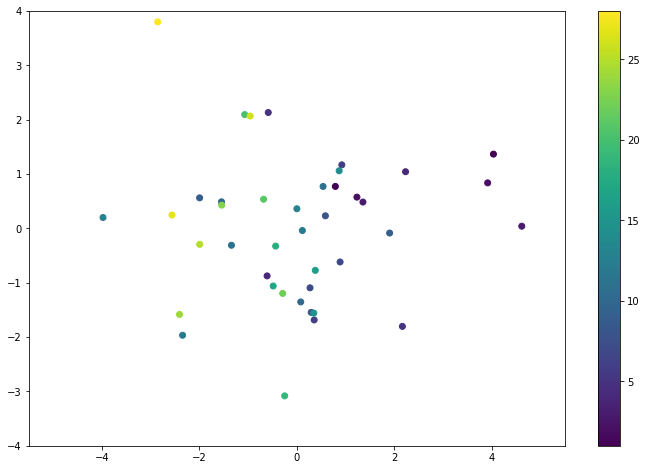

In [64]:
# projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)

# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 1],
    # colorer en utilisant la variable 'Rank'
    c=df.get('Rank'))

plt.xlim([-5.5, 5.5])
plt.ylim([-4, 4])
plt.colorbar()
rcParams['figure.figsize'] = (12, 8)

(-0.7, 0.7)

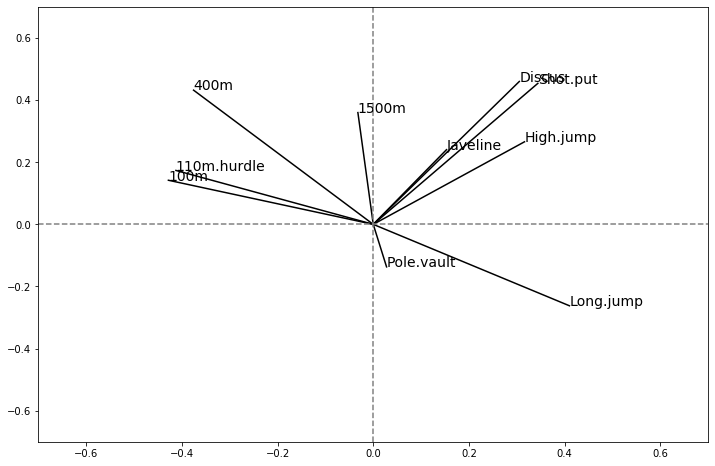

In [65]:
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # origin
    plt.plot([0, x], [0, y], color='k')
    # performance name
    plt.text(x, y, df.columns[i], fontsize='14')

# Y axis
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
# X axis
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

The more the difference angle of variable is near 0, the more variable are correlated.
One thing to mention is that, the more variable are near to a circle with 1 radius, the more they are precise in the interpretation.

We can see, in the first axis, that variables which contributes negatively are the competition which are better when there are a reduced time (courses 100m, 400m, 1500m ...), while positive variables are more related to better score when they are higher (javleline, jump ...)

Nextly, the second axis tells us about a combination between power and lightness of athlete. Some skills require on more than other.

In order to produce a good PCA, we should keep :

In [66]:
def cumul_sum_axis(tab):
    tab2 = tab
    for i in range(1, len(tab)):
        tab2[i] = tab2[i-1] + tab[i]
    return tab2
cumul = cumul_sum_axis(pca.explained_variance_ratio_)
print("Percentage of cumulated information kept by keeping x axis :\n{}".format(cumul))

Percentage of cumulated information kept by keeping x axis :
[0.32719055 0.50090366 0.64139532 0.74708036 0.81555771 0.87548458
 0.92060811 0.96029577 0.98177725 1.        ]


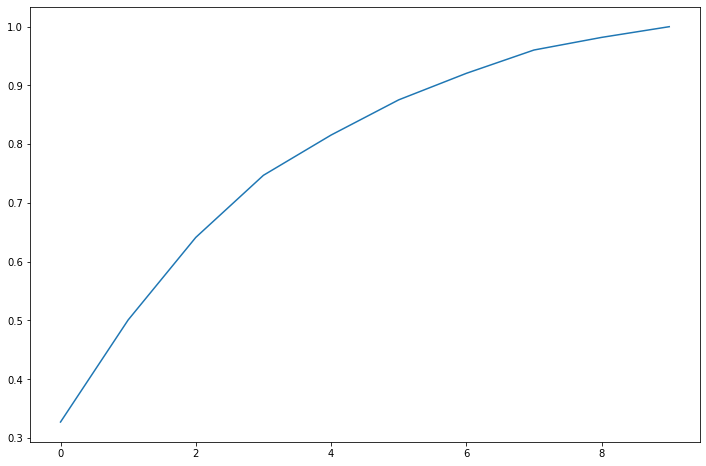

In [67]:
plt.plot(cumul)

Depending on our need, we could keep 3 axis (elbow method) or 7 following the second elbow